<a href="https://colab.research.google.com/github/krishvsoni/MLOps/blob/main/MLOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLOps with PyCaret + MLflow
A beginner-friendly, step-by-step tutorial on integrating MLOps in your Machine Learning experiments using PyCaret.

## PyCaret
PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is known for its ease of use, simplicity, and ability to quickly and efficiently build and deploy end-to-end ML prototypes.

## MLflow
MLflow is an open-source platform to manage the ML lifecycle, including experimentation, reproducibility, deployment, and a central model registry. MLflow currently offers four components:

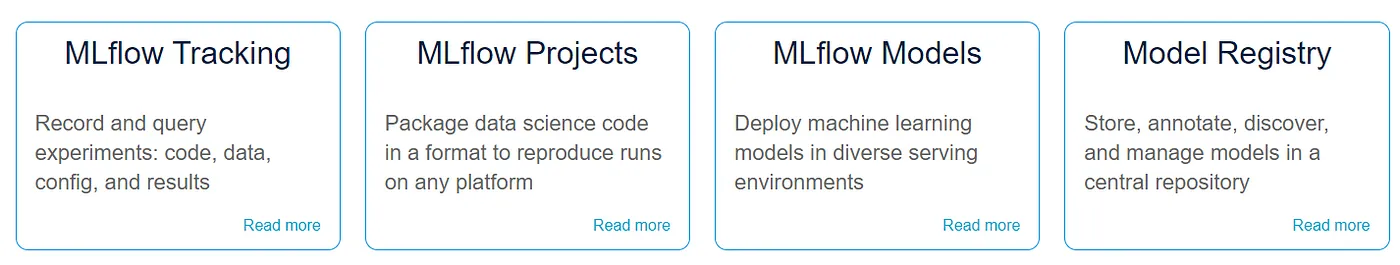

## Machine Learning Lifecycle
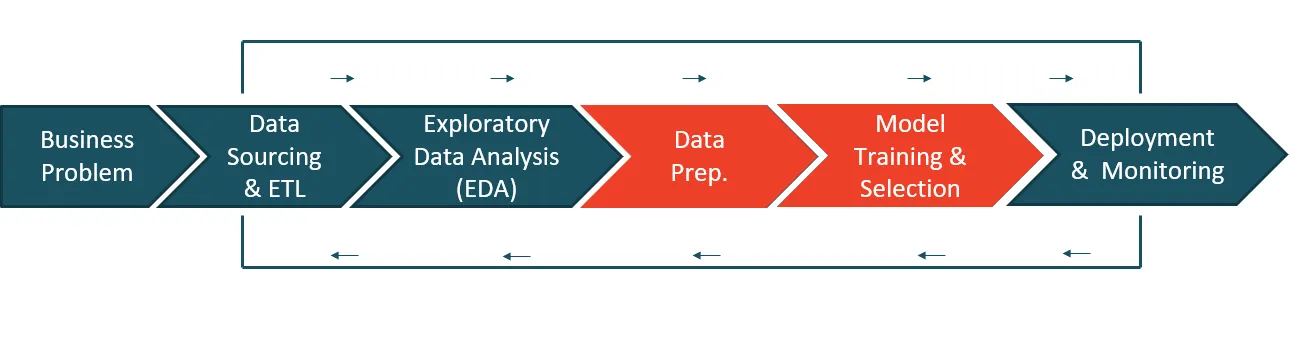

**Business Problem:** Data scientists meet with subject matter experts (SME’s) to gain an understanding of the problem, interview key stakeholders, collect information, and set the overall expectations of the project.

**Data Sourcing & ETL:** Once the problem understanding is achieved, it then comes to using the information gained during interviews to source the data from the enterprise database.

**Exploratory Data Analysis (EDA):** where you analyze the raw data. Your goal is to explore the data and assess the quality of the data, missing values, feature distribution, correlation, etc.

**Data Preparation:** This includes actions like dividing data into a train and test set, imputing missing values, one-hot-encoding, target encoding, feature engineering, feature selection, etc.

**Model Training & Selection:** This involves training a bunch of models, tuning hyperparameters, model ensembling, evaluating performance metrics, model analysis such as AUC, Confusion Matrix, Residuals, etc, and finally selecting one best model to be deployed in production for business use.

**Deployment & Monitoring:** This is the final step which is mostly about MLOps. This includes things like packaging your final model, creating a docker image, writing the scoring script, and then making it all work together, and finally publish it as an API that can be used to obtain predictions on the new data coming through the pipeline.

## MLOps
MLOps is a discipline that aims to combine machine learning development i.e. experimentation (model training, hyperparameter tuning, model ensembling, model selection, etc.), normally performed by Data Scientist with ML engineering and operations in order to standardize and streamline the continuous delivery of machine learning models in production.


## Business Problem
A very popular case study by Darden School of Business, published in [Harvard Business](https://hbsp.harvard.edu/product/UV0869-PDF-ENG). The case is regarding the guy named Greg who wants to buy a ring. The problem is to find the ring his wife Sarah will like, but after a suggestion from his close friend, Greg decides to buy a diamond stone instead so that Sarah can decide her choice. Greg then collects data of 6000 diamonds with their price and attributes like cut, color, shape, etc.

## Data
Published in [Harvard Business](https://hbsp.harvard.edu/product/UV0869-PDF-ENG), the goal of this tutorial is to predict the diamond price based on its attributes like carat weight, cut, color, etc. 

## Installing PyCaret


In [ ]:
pip install pycaret

In [ ]:
from pycaret.datasets import get_data
data = get_data('diamond')


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


## Exploratory Data Analysis

In [ ]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'],
                facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()


## Plot histogram

In [ ]:
fig = px.histogram(data, x=["Price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()
# Notice that distribution of Price is right-skewed. Let's see if log transformation can normalize this.

In [ ]:
import numpy as np

# create a copy of data
data_copy = data.copy()

# create a new feature Log_Price
data_copy['Log_Price'] = np.log(data['Price'])

# plot histogram
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgram of Log Price', template = 'plotly_dark')
fig.show()

In [ ]:
pip install pycaret

## Data Preparation

In [ ]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

# `setup` function in PyCaret, it profiles the dataset and infers the data types for all input features. 
# If all data types are correctly inferred, you can press enter to continue.

,Description,Value
0,session_id,8668
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


INFO:logs:Logging experiment in MLFlow
2023/02/18 18:26:57 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scalin

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Model Training & Selection

In [ ]:
best = compare_models()
# MAE (Mean Absolute Error) is the average absolute error between actual and predicted values.
# MSE (Mean squared error) is the average squared distance between the observed and predicted values.

NameError: ignored

In [ ]:
# check the residuals of trained model
plot_model(best, plot = 'residuals_interactive')

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


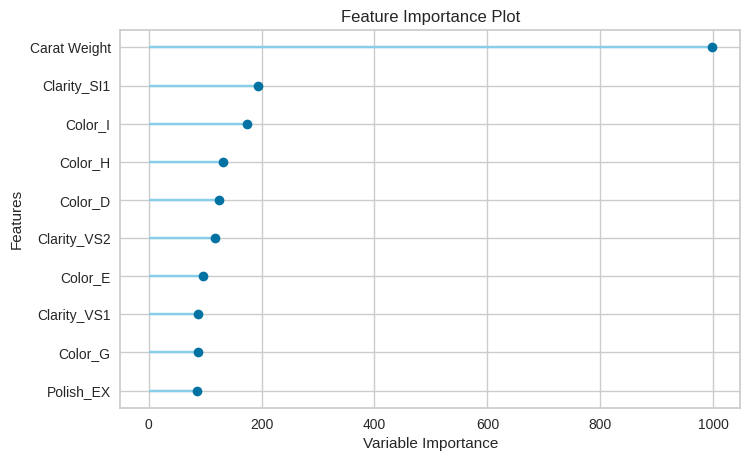

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# check feature importance
plot_model(best, plot = 'feature')

In [ ]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=8...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    

In [ ]:
save_model(final_best, '')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=8...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
        

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    

## Deployment using MLflow

In [ ]:
!mlflow ui

[2023-02-18 18:43:41 +0000] [10233] [INFO] Starting gunicorn 20.1.0
[2023-02-18 18:43:41 +0000] [10233] [INFO] Listening at: http://127.0.0.1:5000 (10233)
[2023-02-18 18:43:41 +0000] [10233] [INFO] Using worker: sync
[2023-02-18 18:43:41 +0000] [10235] [INFO] Booting worker with pid: 10235
[2023-02-18 18:43:41 +0000] [10236] [INFO] Booting worker with pid: 10236
[2023-02-18 18:43:41 +0000] [10237] [INFO] Booting worker with pid: 10237
[2023-02-18 18:43:41 +0000] [10238] [INFO] Booting worker with pid: 10238
